## CS110
- Assignment 3

In [38]:
#!pip install biopython   #These two lines install biopython and drawtree that are the two libraries that I will be using.
#!pip install drawtree    #Please take the # signs out and run this cell if the libraries are not installed on your system


In [39]:
from Bio import pairwise2

from drawtree import draw_level_order


## Write python code to give the length of the longest common subsequence for two strings.

In [40]:
def lcs(X , Y): #code to find the longest common subsequence of two strings X and Y using DP in a bottom up fashion
    m = len(X)  #length of x
    n = len(Y)  #Length of Y
    c = []   
    for i in range(m+1): #defining an array to contain the length for LCSs 
        c.append([0]*(n+1)) #  setting the array to zero initially to update through the for loops
  
    
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : #starting from the bottom when the length is zero and so the LCS is zero
                c[i][j] = 0
            elif X[i-1] == Y[j-1]: #if Xi-1 = Yi-1 then we accumulate the value of c[i-1][j-1] by 1
                c[i][j] = c[i-1][j-1]+1
                
            else:  # in the case when Xi-1 != Yi-1
                
                c[i][j] = max(c[i-1][j] , c[i][j-1]) #This can be viewed as taking the higher of either the top or 
                #left cell in a matrix
  
    return c[m][n]  #Returning the final value for the LCS of X and Y


## Generate the table of the lengths of the longest common subsequences for every pair of strings.

In [41]:

S0 = 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'

S1 = 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'

S2 = 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'

S3 = 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'

S4 = 'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'

S5 =  'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'

S6 =  'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'


genes = [S0,S1,S2,S3,S4, S5, S6]

table=[]

for i in range(len(genes)):
    table.append([])    #appending arrays to the table to act as rows and finally form a matrix
    for j in range(len(genes)):
        table[-1].append(lcs(genes[i],genes[j])) #appending the values to each row in the table




In [42]:
import pandas as pd

df = pd.DataFrame(table)
df



,0,1,2,3,4,5,6
0,100,74,76,73,82,84,91
1,74,90,67,72,80,70,71
2,76,67,97,65,69,81,84
3,73,72,65,96,81,71,69
4,82,80,69,81,96,74,75
5,84,70,81,71,74,111,97
6,91,71,84,69,75,97,104


## Manually examine the table, and infer the relationships between strings.

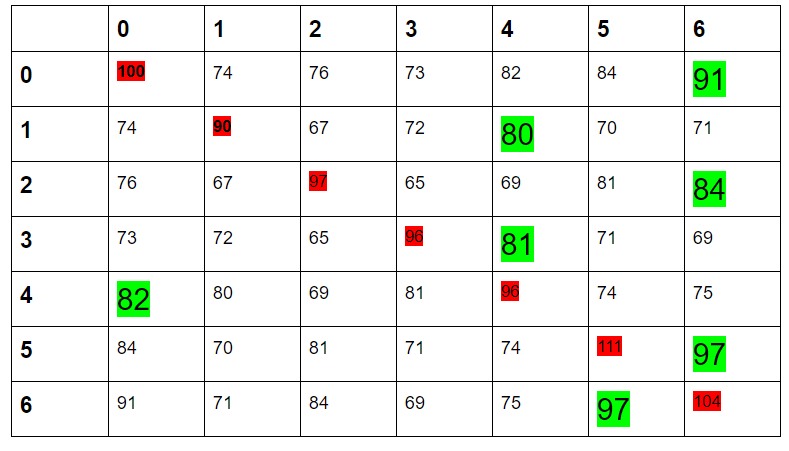

In [43]:
from IPython.display import Image
Image("table.PNG")

#Note the red values are the length of the string itself. The green values are the maximum value in the row

In order to infer the relationships between the strings, I should use the LCS of every two strings as the measure of how close they are to eachother so that the greater the value of the LCS the more likely the pair to be related (as a parent and a child). So in order to find the most likely parent or child for every string in the table, I will take the maximum value of each row and that value will indicate which string is closest to which. For example, for the row of string 0 the maximum value is 91 and so the most likely parent or child of 0 is 6 so I will save 0 and 6 in an array:

Array of Relationships = $[[0,6]]$

Then for the row of string 1, the maximum value in the row is 80 so the most likely parent or child of 1 is 4

Array of Relationships = $[[0,6], [1,4]]$

Repeating the above operation for all rows, I get:

Array of Relationships = $[[0,6], [1,4], [2,6], [3,4],[4,0],[5,6], [6,5]]$

Because $[5,6]$ and $[6,5]$ are the same I end up with the following list of relationships:

$[[0,6], [1,4], [2,6], [3,4],[4,0],[5,6]$

Now knowing that we have seven nodes, the tree can be like the following:

From the tree I noted that in this specifc case of binary trees, the root 'a' will have only two relationships (one with b and one with c)

'b' will have three relationships (one with parent 'a' and two with children 'd' and 'e'

'c' will have three relationships (one with parent 'a' and two with children 'f' and 'g')

Then finally the grandchildren will each have one relationship with their parent.

Then if we examine the array of relationships we made, we find that:
- 0 has only two relationships, one with 6 and one with 4. So 0 is the root 'a'
- 6 has three relationships, with 0, 4 and 5. So 6 can be either the node 'b' or 'c'
- 4 has three relationships, with 1, 3, and 0. So 4 can be either the node 'b' or 'c'

Then so far the tree is:

Then from the array of relationship we have and from the tree, we can deduce that:
- d and e can be either 5 or 2
- f and g can be be either 1 or 3

(Because these numbers are related to 6 and 4)

Then we end up that the most probable tree is the following one:

Please note that there might be more possible arrangments of trees but the obtained one is most probable depending on having the maximum value of LCSs

## Can you devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.

In [44]:
def tree(matrix): #algorithm that finds the tree of relationships in the case of seven strings
    tree_relation = [2,3,3,1,1,1,1] #That represents the number of relations each node should have. The root should have 2
    #relationships, then the children of the nodes each should have 3, and finall each grandchild should have 1 
    vertices= [] #Array to contain the arrays of all possible relationships in the form of [[a,b],[c,d]]
    for i in range(len(matrix)): #finding the array of relationships
        x = 0   #using x to find the maximum
        for j in range(len(matrix)):
            
            if matrix[i][j] >x and i!=j:
                x = matrix[i][j] #updating the x value with the higher value
                ind = j
        if [ind, i] not in vertices: #to make sure not to include duplicates
            vertices.append([i,ind])
  
                
    
    extended_list = [] #Here because the vertices are included in the form [[a,b],[c,d]] I will extend that list to the form
    #of [a,b,c,d] to make it easier to count the values inside
    [ extended_list.extend(el) for el in vertices] 
    for i in range(len(extended_list)):
        m = extended_list.count(extended_list[i]) #counting each string to match with the number of relationships in the tree
        if m in tree_relation and m!=1 : #avoiding 1 because its the grandchild, will make a separate step for it
            tree_relation[tree_relation.index(m)] = extended_list[i] #Now matching the count of a string with number of
            #relations in the tree and replacing the string with that number in the tree_relation table
      
    #the above code should add the root and its two children to the tree
    #the code below will add the grandchildren
    for i in range(len(vertices)): 
        if tree_relation[1] in vertices[i]: #looking for the child of each parent
            for j in vertices[i]:
                if j != tree_relation[0] and j != tree_relation[1]: #making sure that the value is not the root or the parent
                    #itself
                    if tree_relation[3] ==1: #Replace only if the grandchild is still not updated in the tree_relation
                        #which means it still has the value 1
                    
                        tree_relation[3] = j
                    else: #Adding the second grandchild
                        tree_relation[4] = j
                        
        elif tree_relation[2] in vertices[i]: #this will do just the same but for the second parent
            for j in vertices[i]:
                if j!= tree_relation[0] and j != tree_relation[2]:
                    if tree_relation[5] ==1: 
                        tree_relation[5] = j  #Adding the other two grandchildren to the tree_relation
                    else:
                        tree_relation[6] = j
                    
            
    return tree_relation #Returning the final tree structure
                   
    
s = tree(table) 
print("The most probable tree is the following one:")
print(s)
draw_level_order(str(s)) #drawing the tree 




The most probable tree is the following one:
[0, 6, 4, 2, 5, 3, 1]
      0
     / \
    /   \
   /     \
  6       4
 / \     / \
2   5   3   1


In [45]:
def tree_general(matrix):
    dictt = {} #I will use this dictionary to store the number of relationships for each string and its children/parent
    tree_structure = [] #tree structure will be filled here
    vertices= [] #this array will have the relationships between the strings
    
    
    for i in range(len(matrix)): #Filling vertices with the relationships with the following codes
        x = 0   
        for j in range(len(matrix)):
            
            if matrix[i][j] >x and i!=j: 
                x = matrix[i][j]
                ind = j
        if [ind,i] not in vertices:
            
            vertices.append([i,ind]) 


    extended_list = [] #extending the list to count the number of relationships and store it in the dictionary
    [ extended_list.extend(el) for el in vertices]
    for i in extended_list:
        if i not in dictt:
            dictt[i] = [extended_list.count(i)] #storing strings along with the number of relationships for each one
        

    for i in range(len(vertices)): #This for loop will store the children/parent of each string in the dictionary
        if vertices[i][1] not in dictt[vertices[i][0]][1:]: 
            dictt[vertices[i][0]].append(vertices[i][1])

        if vertices[i][0] not in dictt[vertices[i][1]][1:]: #I added the [1:] at the end to avoid confusion with the number of
            #relationships that is already there. 
            dictt[vertices[i][1]].append(vertices[i][0])
    
    for key in dictt:  #Finding the root and adding it to the tree
        if dictt[key][0] == 2:
            tree_structure.append(key)
            
    #after finding the root, the following code will solve the subproblems by appending the children of each parent to the tree
    
    k = 0 #I start with one parent and then append it children to the tree which get appened just after its sibling and that 
    #ensure the structure of the binary tree
    
    while len(tree_structure) < len(matrix): 
        parent = tree_structure[k] #updating the parent ever iteration
        for i in dictt[parent][1:]: #adding the children of the parent to the tree, again [1:] to avoid the number of 
            #relationships that is placed in the beggining of every array for the dictionary's keys
            if i != parent and i not in tree_structure :
                tree_structure.append(i)
        k+=1

    return tree_structure

          
    
s = tree_general(table) 
print("The most probable tree is the following one:")
print(s)
draw_level_order(str(s)) #drawing the tree 

    

    
#I made this algorithm based on the assumption that I will always find the root in the matrix by looking for the value that is
#found twice. I'm not sure if that will always be the case but the algorithm will always work as long as the vertices out of the
#matrix will have a string that has maximum LCS with two other strings only.

#Also, after I wrote that code, I discovered that I will need the number of relationships only once to find the root and then
#I will just add the children to their parents without worrying about how many relationships they have. So I don't really need
#to use the number of relationships everytime and I can not store all of it from the begining to save space, also I mentioned
#in the psuedocode that I will need a separate step for the strings with one relationship but now I realized that I don't 
#actually need that as all the children can be added to their parents.

#the complexity of this dynamic programming code is O(N^2) considering that the matrix is given as an input.

The most probable tree is the following one:
[0, 6, 4, 2, 5, 1, 3]
      0
     / \
    /   \
   /     \
  6       4
 / \     / \
2   5   1   3


## How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)

In order to estimate these probabilities, I need to know two things:
- Numbers of insertions, deletions, replacements in each string
- Number of probabilities that were generated for each string

If I know these two, then the probability of each operation will be the number of operations/total number of probabilities.

I will assume that the way that DNA works is that it takes a string and for each character, it generates a probability to either replace or delete that character or add another next to it. So the algorithm I'm assuming works as follows:

For each character in string1:
-    Generate probability
-    if probability = Insertion_probability, then add a new char
-    if probability = Deletion_probability, then delete that character
-    if probability = Replacement_probability, then replace that character with a new character
    
So from my asumption, the number of probabilities that will be generated for one string is the length of the string. 

Then if I can count the number of insertions, deletions, and remplacements in each string, I will divide these numbers by the length of the string to get the probability. Then to get more accurate result, I would do the same to every parent and its child then take the average of the probabilities.

Now the only thing missing is the number of operations implemented on each string. The operations can either be insertions, deletions, replacements or no change at all. Due to the big length of the strings, it might be a little bit difficult to find out the exact number of each operations. A good approach I can think of is using the edit distance function to align two strings and count the number of operations done to each one. A similar and simpler approach that I will use is using the biopython library that takes two DNA genes and then adds spaces to make the two genes length the same and then creates a score depending on how many characters in the strings match or dismatch. I will use an algorithm that will provide an approximate number of operations as the following:

- Use Biopython pairwise function to generate alignment between a parent and its child
- Go through the two strings and do the following assumptions:
    - if you find a space in the parent string then that means a character was inserted: insertions+=1
    - if you find a space in the child then it means that a character was deleted: Deletions +=1
    - If you find two characters in the same position that don't match, then that means character was replaced: replacements+=1
    
The reasoning behind the above assumption is that if I find a space in the parent string, then the child has a character that parent doesn't have and that means insertions happend. Similarly for deletion, if there is a space in the child then a character must have been deleted. Replacement will happen if two characters don't match. This is not always accurate and that's why this algorithm will provide an approximate number for each operation and not an exact one because for example sometimes a dismatch between two characters doesn't mean a replacement but a deletion and then insertion. Also, finding a space in either the parent of the child doesn't always mean an insertion or deletion because there might be many different alignments between the two strings. However, in the following code, I used biopython pairwise to find the alignment with the most similarity to get a rough estimation.

In [46]:
def probability(S1, S2):
    alignments = pairwise2.align.globalms(S1, S2,1,-1,-1,-1) #The numbers I added are used by biopython to generate a score of
    #similarity (e.g. 1 for match, -1 for dismatch, -1 for space, -1 for more spaces) but because I used the LCS as the measure
    #of similarity, I will not need the score of biopython but I just added it to get the alignment and estimate the number of
    #operations

    n_insertions = 0
    n_deletions = 0
    n_replacements = 0
    for i in range(len(alignments[0][0])):
        if alignments[0][0][i] == "-": #if there is a space in the parent, then insertion happened
            n_insertions+=1
        elif alignments[0][1][i] == "-": #if there is a space in the child, then deletion happened
            n_deletions+=1

        elif alignments[0][0][i] !=  alignments[0][1][i]: #if there is a dismatch, then replacement happened
            n_replacements +=1


        
    return n_insertions/len(S1),  n_deletions/len(S1), n_replacements/len(S1)  #returning the probability of each operation   


#the following will generate the probaility for each pair. Note that I didn't choose random pairs but those with parent-child 
#relationship

prob1 = probability(S0, S6)
prob2 = probability(S0, S4)
prob3 = probability(S6, S5)
prob4 = probability(S6, S2)
prob5 = probability(S4, S1)
prob6 = probability(S4, S3)

Prob_table = [prob1,prob2,prob3,prob4,prob5,prob6]

#will use the following to get the average probability
Insertions_prob=0
Deletions_prob = 0
Replacements_prob = 0

for i in Prob_table:
    Insertions_prob+= i[0]
    Deletions_prob+= i[1]
    Replacements_prob+= i [2]
    
print("Probability of Insertions is approximately:", str(int((Insertions_prob/6)*100))+"%")
print("Probability of Deletions is approximately:", str(int((Deletions_prob/6)*100))+"%")
print("Probability of Replacements is approximately:", str(int((Replacements_prob/6)*100))+"%")

Probability of Insertions is approximately: 7%
Probability of Deletions is approximately: 8%
Probability of Replacements is approximately: 6%


## Describe the complexity of your solution to identify related “genes” for this assignment. (Let M be the length of a gene, and N be the number of genes.)

For my solution, I first used an algorithm to generate the LCS of any two strings, the algorithm run time complexity is O(M1*M2) where M1 is the length of the first string and the M2 is the length of the second string, Because we have different strings that have very similar length then we can take the length M which is the maximum length of the strings and take it as an upper bound. 
Then the runtime and space complexity of my LCS algorithm is O($M^{2}$)

I then used the algorithm to generate a table of the LCSs, I generated the table by calculating the LCS of every pair of genes which took a run time complexity of O($N^{2}*M^{2}$) (Two for loops of length N that used LCS $N^{2}$ times) and a space complexity of O($N^{2}$) (that's the memory for the N*N matrix)

where N is the number of strings and M is the length of the genes (maximum length as I assumed).


Finally, I used the table of LCS to find the tree which took a run time complexity of O( $C*N^{2}$) where C is a constant and that is because the algorithm required using two for loops several times(C times). The space complexity is O(Constant* N) (to store the tree structure and the relationship values)

So the complexity of my solution to identify the related genes is then O($N^{2}*M^{2}$ + $C*N^{2}$) = O($N^{2}*M^{2}$) and the space complexity is O($N^{2}$ +C*N) = O($N^{2}$)

## References

- Geegsforgeeks Website retrieved from https://www.geeksforgeeks.org


## Appendix
- #deduction: I used deduction to deduce the relationships between the strings from the information given
- #composition: I used a clear and precise style to make my assignment clear and easy to understand
- #algorithms: I devised efficient algorithms and wrote codes with detailed comments